### Loading the modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import kineticsim_reader as kr
import pickle
import os

C:\Users\Slava\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Setting up a path to the simulation file and the number of species to include

In [2]:
# Please repalce the simulation file path with the path on your machine
simulationfile = r'C:\Users\Slava\Google Drive\[Projects]\[yyyy] [Project] PSP ML\particles.d11_pv2av2_rdna0.03375_128x3_iden0eps1e-4_dx0.75_t6000'
# The number of species for the selected simulation
kspi = 4
# Indexes corresponding to protons and alpha particle species
kspi_pr = [0,1]
kspi_he = [2,3]

### Working with the simulation

Displaying information about the simulations. This routine takes the filename and the number of species as an input and returns the header parameters and the frame record #, iteration #, and timing in gyroperiods.

In [3]:
header = kr.show_fileinfo(simulationfile, kspi=kspi)

Header information:
HEADER[0]:          dt: 0.02
HEADER[1]:          dx: 0.75
HEADER[2]:          dy: 0.75
HEADER[3]:       itmax: 300006.0
HEADER[4]:        ifld: 2.0
HEADER[5]:      betaen: 0.429
HEADER[6]:         nis: 4.0
HEADER[7]:          nx: 128.0
HEADER[8]:          ny: 128.0
HEADER[9]:         npt: 8388608.0
HEADER[10]:    ifields: 50.0
HEADER[11]: iparticles: 2000.0
HEADER[12]:    ienergy: 50.0
HEADER[13]:    ifilter: 1250.0
HEADER[14]:        bx0: 1.0
HEADER[15]:        by0: 0.0
HEADER[16]:        bz0: 0.0
HEADER[17]:      icont: 1.0
HEADER[18]:      xlres: 0.0
Frame record in file: 1 , Frame number: 226001.0 , Frame timing: 4520.02
Frame record in file: 2 , Frame number: 228001.0 , Frame timing: 4560.02
Frame record in file: 3 , Frame number: 230001.0 , Frame timing: 4600.02
Frame record in file: 4 , Frame number: 232001.0 , Frame timing: 4640.02
Frame record in file: 5 , Frame number: 234001.0 , Frame timing: 4680.02
Frame record in file: 6 , Frame number: 236001.0 , Fram

Reading of the selected frame in the simulations. Based on the information in the header output, one can selecte the frame record # to read (in our case it will be the frame # 10) and return the timing and distribution variables.

The routine takes the filename, the record # in file, and the number of species as an input. It returns the frame number, time in gyroperiods, and position (xp, yp) and velocity (vxp, vyp, vzp) distributions as arrays.

In [4]:
timfrm, timep, xp, yp, vxp, vyp, vzp = kr.return_selectedframe(simulationfile, 10, kspi=kspi)

Reading the file...
Done.


Generating the histogram (VDF) for the simulations. The inputs are the velocity arrays (x and y for this case), the resolution of the VDF in Alfven speeds (0.05 VA for this case), and the starting and ending number of species. For this example, istart=0 and iend=2, which means that the histogram will be constructed for the species 0 and 1 combined. One can change it to the 0 and 1 to visualize to the core only.

The next line visualizes the VDF. The histogram limits are currently set to +/-3.5vA (for ML purposes), however, the customized limits will be available in future. There is an option to save the VDF to the file as an image, please check 'kineticsim_reader.py' for details.

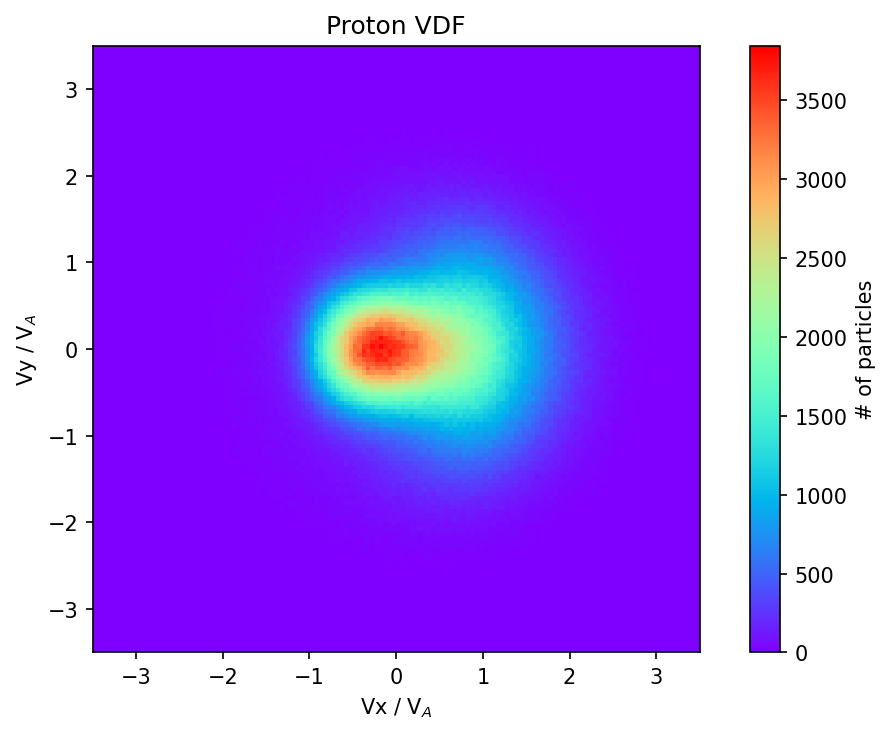

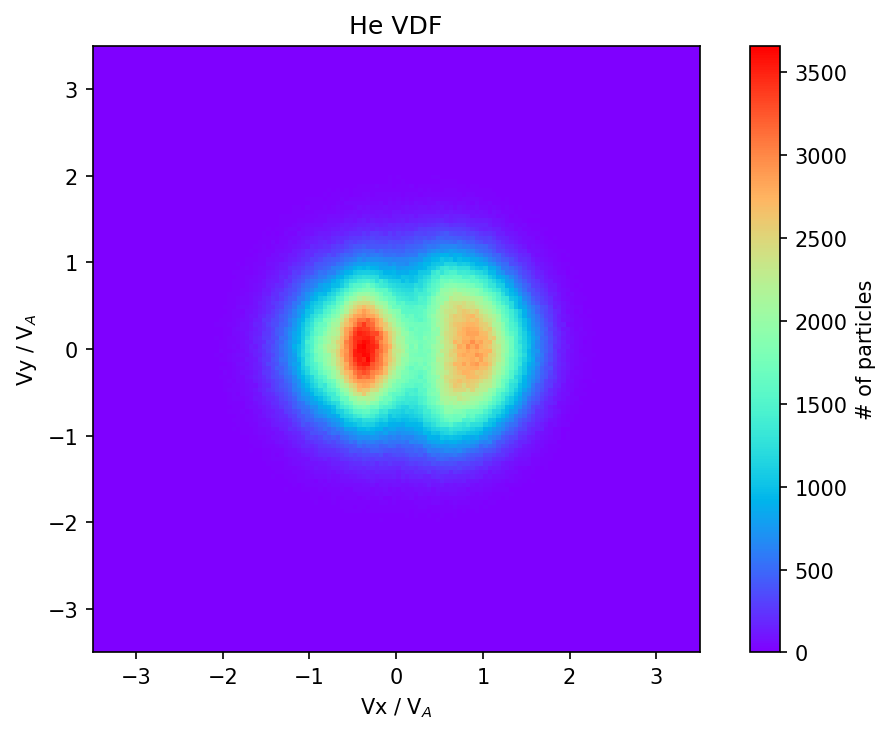

In [5]:
hist, vx_edges, vy_edges = kr.generate_histogram(vxp, vyp, 0.05, kspi_indexes = kspi_pr)
kr.visualize_histogram(hist, vx_edges, vy_edges, 'Proton VDF', to_image = False)

hist, vx_edges, vy_edges = kr.generate_histogram(vxp, vyp, 0.05, kspi_indexes = kspi_he)
kr.visualize_histogram(hist, vx_edges, vy_edges, 'He VDF', to_image = False)

Lastly, we can compute the anisotropy and moments for this VDF

In [6]:
anisotropy_p, moments_p = kr.calculate_anisotropy_moments(vxp, vyp, vzp, kspi_indexes = kspi_pr)
anisotropy_he, moments_he = kr.calculate_anisotropy_moments(vxp, vyp, vzp, kspi_indexes = kspi_he)
print("Proton anisotropy:", anisotropy_p)
print("He anisotropy:", anisotropy_he)
print("Proton moments:", moments_p)

Proton anisotropy: 0.7843663229196386
He anisotropy: 0.6121669890333552
Proton moments: [[ 3.50899339e-01 -5.47791249e-04  5.22112357e-04]
 [ 6.30077839e-01  4.93776441e-01  4.94647235e-01]
 [ 8.31495076e-02 -5.66887145e-04 -1.69139574e-04]
 [ 1.09092653e+00  9.00010943e-01  9.02214646e-01]]


The moments are 4x3 matrix, where:
- the dimension 3 corresponds to x, y, and z components
- the dimension 4 corresponds to the mean velocities and 2-4 degree moments centered at the mean velocity